In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
filepath = "/home/idies/workspace/Storage/Mathisa5/persistent/small_1800.h5"

In [4]:
pd.set_option('display.precision', 15)

In [5]:
import h5py

with h5py.File(filepath, "r") as f:
    def explore(name, item):
        print(name, type(item))

    f.visititems(explore)

is_pulsar <class 'h5py._hl.dataset.Dataset'>
phi <class 'h5py._hl.dataset.Dataset'>


In [6]:
# there are 2 datasets, X and y. Let's examine the X
with h5py.File(filepath, "r") as f:
    X = f["phi"][:]
    print("shape:", X.shape)

shape: (14476, 1800)


In [7]:
# there are 2 datasets, X and y. Let's examine the y
with h5py.File(filepath, "r") as f:
    y = f["is_pulsar"][:]
    print("shape:", y.shape)

shape: (14476,)


In [8]:
X

array([[ 402.,    0.,    0., ..., 1863., 5823., 1233.],
       [3672., 4644., 1421., ..., 3143., 3682.,  644.],
       [ 780., 1026.,  783., ..., 1597., 1078., 1700.],
       ...,
       [2204., 2563.,  978., ...,   76., 3102.,    0.],
       [2204.,  658., 1560., ...,    0., 2848., 4124.],
       [   0.,    0., 7477., ...,    0., 3873.,    0.]],
      shape=(14476, 1800))

In [9]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,402.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.0,1076.0,1414.0,3610.0,4838.0,1048.0,2478.0,1863.0,5823.0,1233.0
1,3672.0,4644.0,1421.0,1460.0,403.0,911.0,1146.0,6425.0,5238.0,5979.0,...,819.0,1117.0,6815.0,1888.0,2031.0,1211.0,1370.0,3143.0,3682.0,644.0
2,780.0,1026.0,783.0,495.0,2951.0,3051.0,1859.0,1408.0,723.0,2032.0,...,1671.0,824.0,2686.0,917.0,1940.0,3917.0,821.0,1597.0,1078.0,1700.0
3,4776.0,868.0,3402.0,1327.0,819.0,511.0,4444.0,3561.0,1068.0,1123.0,...,1516.0,1168.0,5467.0,1660.0,463.0,6544.0,712.0,4573.0,966.0,4676.0
4,6265.0,3519.0,3275.0,1351.0,734.0,4143.0,1932.0,11209.0,387.0,1316.0,...,3692.0,4714.0,1623.0,3333.0,1218.0,2033.0,1411.0,1634.0,7702.0,1500.0


In [10]:
y_df = pd.DataFrame(y)
y_df.value_counts()

0
1    11145
0     3331
Name: count, dtype: int64

In [11]:
# thus there are 11145 pulsars and 3331 black holes, moderately imbalanced learning problem

## Pulsar Distribution Analysis

In [12]:
# Let's take a look at a sample observation for a pulsar
pulsars_df = X_df[(y_df == 1).values]
pulsars_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
594,331.0,635.0,571.0,0.0,3964.0,3622.0,5950.0,242.0,1349.0,392.0,...,6457.0,0.0,1454.0,1458.0,186.0,40.0,0.0,57.0,6877.0,0.0
595,115.0,4178.0,1328.0,0.0,321.0,34.0,0.0,0.0,277.0,0.0,...,167.0,2571.0,0.0,0.0,806.0,65.0,3088.0,1209.0,3833.0,271.0
596,114.0,301.0,4.0,2165.0,3247.0,748.0,2492.0,836.0,0.0,2507.0,...,0.0,186.0,0.0,4343.0,29.0,3327.0,151.0,0.0,3453.0,1715.0
597,2860.0,5153.0,4446.0,259.0,0.0,0.0,0.0,3332.0,0.0,0.0,...,0.0,43.0,1969.0,2399.0,1353.0,251.0,4578.0,56.0,27.0,3301.0
598,1349.0,2540.0,2164.0,716.0,1975.0,18.0,378.0,76.0,3042.0,662.0,...,0.0,729.0,6001.0,3736.0,4122.0,253.0,195.0,0.0,583.0,6295.0


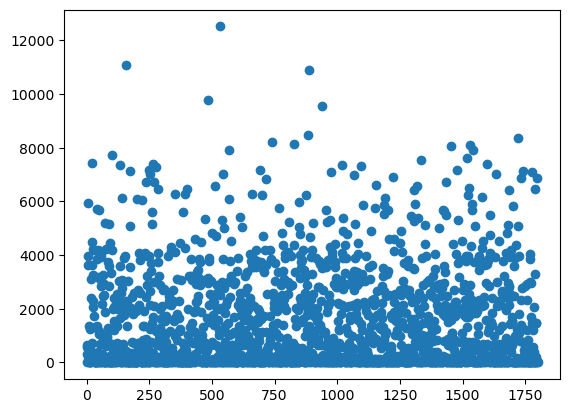

In [13]:
plt.scatter(pulsars_df.columns,pulsars_df.iloc[0])

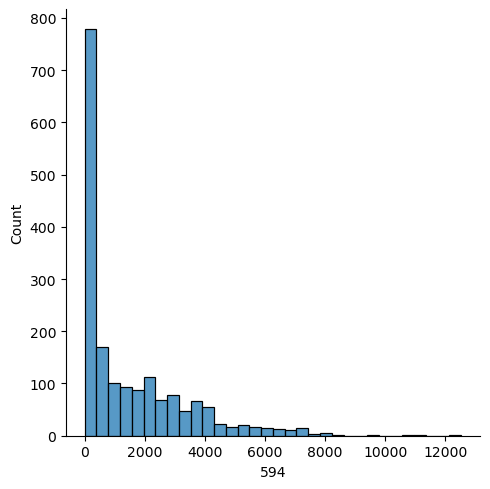

In [14]:
sns.displot(pulsars_df.iloc[0])

In [15]:
pulsars_df.iloc[0].describe()

count     1800.000000000000000
mean      1481.250000000000000
std       1849.612507455989316
min          0.000000000000000
25%          0.000000000000000
50%        697.000000000000000
75%       2402.250000000000000
max      12522.000000000000000
Name: 594, dtype: float64

In [16]:
# let's normalize the data and then plot again

In [17]:
pulsar_0 = pulsars_df.iloc[0]
pulsar_0_mean = pulsar_0.mean()
pulsar_0_std = pulsar_0.std()
pulsar_0_norm = (pulsar_0 - pulsar_0_mean) / pulsar_0_std
pulsar_0_norm.describe()

count    1.800000000000000e+03
mean     4.934324553889585e-18
std      1.000000000000000e+00
min     -8.008434166772338e-01
25%     -8.008434166772338e-01
50%     -4.240077296399126e-01
75%      4.979421345213383e-01
max      5.969223259192688e+00
Name: 594, dtype: float64

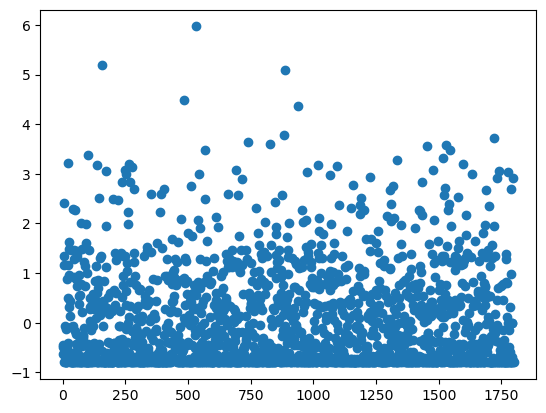

In [18]:
plt.scatter(pulsar_0_norm.index, pulsar_0_norm)

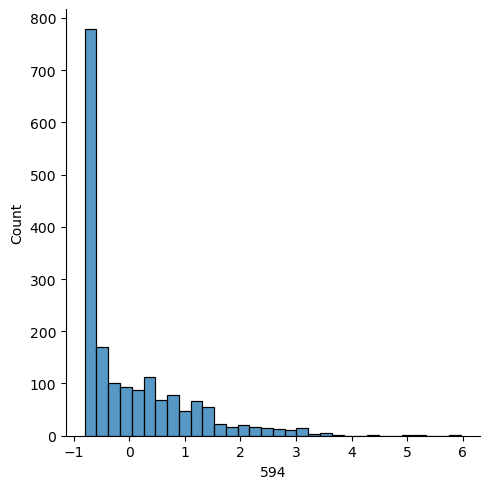

In [19]:
sns.displot(pulsar_0_norm)

In [20]:
# very right skewed now, let's log transform
pulsar_0_log = np.log1p(pulsar_0_norm)
pulsar_0_log.describe()

count    1800.000000000000000
mean       -0.482721181454749
std         0.994216244024873
min        -1.613663912794324
25%        -1.613663912794324
50%        -0.551662800011903
75%         0.404091267680433
max         1.941503777987533
Name: 594, dtype: float64

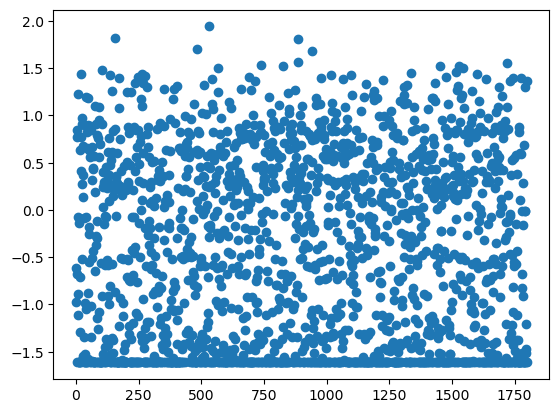

In [21]:
plt.scatter(pulsar_0_log.index, pulsar_0_log)

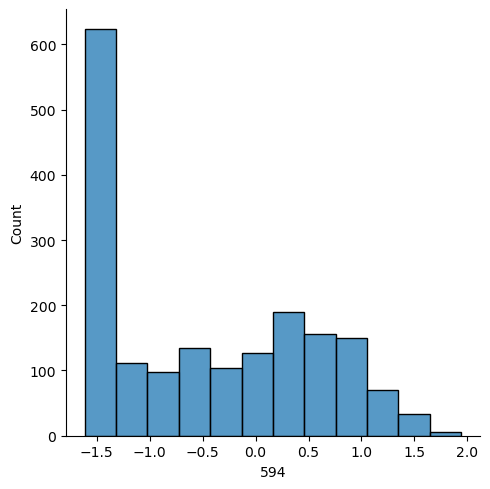

In [22]:
sns.displot(pulsar_0_log)

## Black Hole Distribution Analysis

In [23]:
# now let's see if there is a difference in distribution of these measurements for a black hole

In [24]:
bh_df = X_df[(y_df == 0).values]
bh_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,402.0,0.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,...,563.0,1076.0,1414.0,3610.0,4838.0,1048.0,2478.0,1863.0,5823.0,1233.0
1,3672.0,4644.0,1421.0,1460.0,403.0,911.0,1146.0,6425.0,5238.0,5979.0,...,819.0,1117.0,6815.0,1888.0,2031.0,1211.0,1370.0,3143.0,3682.0,644.0
2,780.0,1026.0,783.0,495.0,2951.0,3051.0,1859.0,1408.0,723.0,2032.0,...,1671.0,824.0,2686.0,917.0,1940.0,3917.0,821.0,1597.0,1078.0,1700.0
3,4776.0,868.0,3402.0,1327.0,819.0,511.0,4444.0,3561.0,1068.0,1123.0,...,1516.0,1168.0,5467.0,1660.0,463.0,6544.0,712.0,4573.0,966.0,4676.0
4,6265.0,3519.0,3275.0,1351.0,734.0,4143.0,1932.0,11209.0,387.0,1316.0,...,3692.0,4714.0,1623.0,3333.0,1218.0,2033.0,1411.0,1634.0,7702.0,1500.0


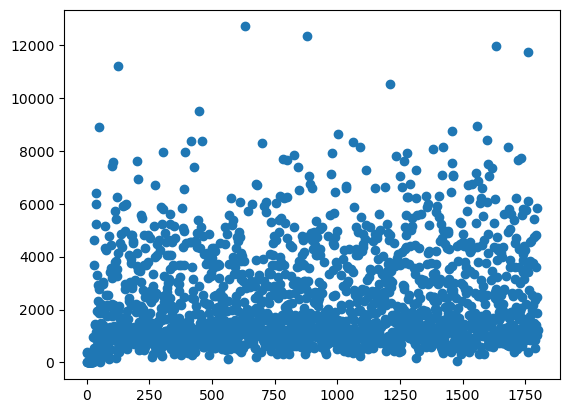

In [25]:
bh_0 = bh_df.iloc[0]
plt.scatter(bh_0.index, bh_0)

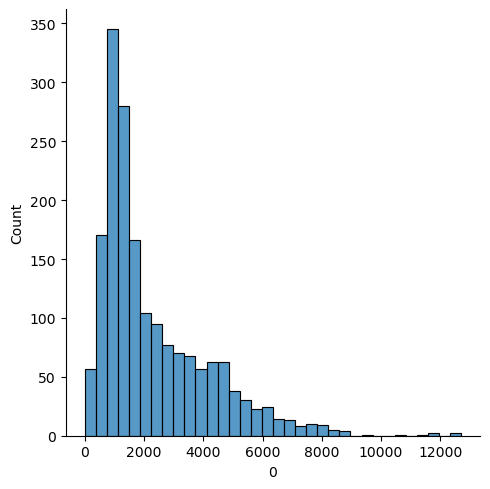

In [26]:
sns.displot(bh_0)

In [27]:
# we can see a clear difference even in the unnormalized distribution already

In [28]:
bh_0.describe()

count     1800.000000000000000
mean      2313.493888888888705
std       1853.686125322550197
min          0.000000000000000
25%        986.000000000000000
50%       1602.000000000000000
75%       3307.000000000000000
max      12702.000000000000000
Name: 0, dtype: float64

In [29]:
bh_0_mean = bh_0.mean()
bh_0_std = bh_0.std()
bh_0_norm = (bh_0 - bh_0_mean) / bh_0_std

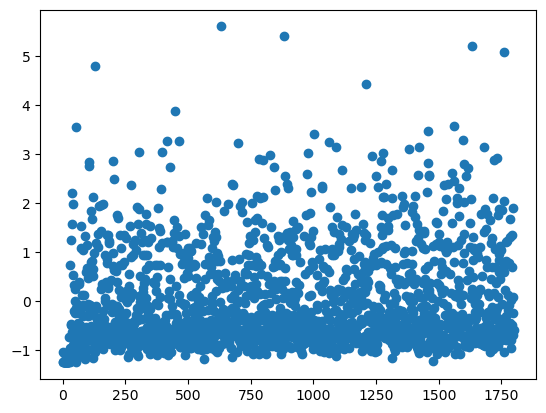

In [30]:
plt.scatter(bh_0_norm.index, bh_0_norm)

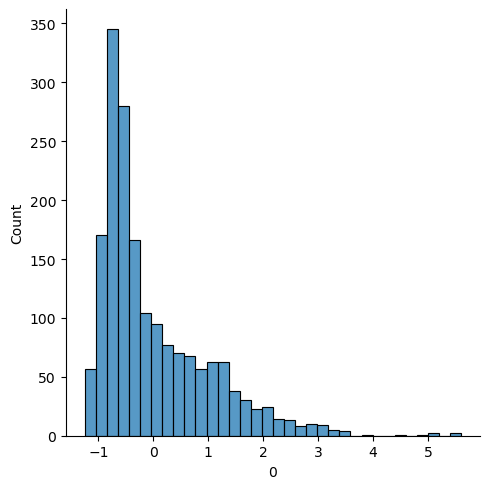

In [31]:
sns.displot(bh_0_norm)

In [32]:
bh_0_norm.describe()

count    1.800000000000000e+03
mean     1.105288700071267e-16
std      9.999999999999999e-01
min     -1.248050496405550e+00
25%     -7.161373604487106e-01
50%     -3.838265168894682e-01
75%      5.359624251048631e-01
max      5.604242255038437e+00
Name: 0, dtype: float64

In [33]:
bh_0_log = np.log1p(bh_0_norm)

/home/idies/miniforge3/envs/heasoft/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


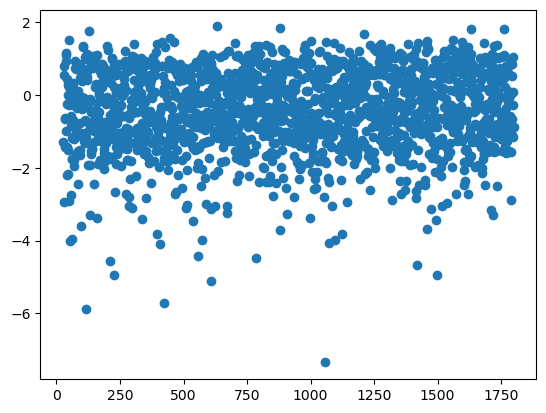

In [34]:
plt.scatter(bh_0_log.index, bh_0_log)

In [35]:
bh_0_log.describe()

count    1718.000000000000000
mean       -0.443712203876678
std         1.122274585332079
min        -7.349100536489653
25%        -1.144059895212930
50%        -0.436779675121618
75%         0.467402193960332
max         1.887712208461760
Name: 0, dtype: float64

## Pulsar v BH Macro Analysis

In [36]:
# pulsars_sample_df = pulsars_df.sample(frac=0.2)
# bh_sample_df = bh_df.sample(frac=0.2)

In [ ]:
# plt.figure(figsize=(10,6))
# sns.heatmap(pulsars_sample_df.corr(), annot=False, cmap="coolwarm")
# plt.title("Pulsars Correlation Matrix")
# plt.show()

# plt.figure(figsize=(10,6))
# sns.heatmap(bh_sample_df.corr(), annot=False, cmap="coolwarm")
# plt.title("Black Holes Correlation Matrix")
# plt.show()

In [ ]:
# corr_diff = pulsars_sample_df.corr() - bh_sample_df.corr()

# plt.figure(figsize=(10,6))
# sns.heatmap(corr_diff, cmap="bwr", center=0)
# plt.title("Correlation Differences (Pulsars - Black Holes)")
# plt.show()

In [42]:
pulsars_df.shape, bh_df.shape

((11145, 1800), (3331, 1800))

In [38]:
def stats_block(df, name):
    desc = df.describe().T  # count, mean, std, min, 25%, 50%, 75%, max
    desc = desc.rename(columns={
        '25%': 'q1',
        '50%': 'median',
        '75%': 'q3'
    })

    # Add IQR
    desc['iqr'] = desc['q3'] - desc['q1']
    
    # Add skew, kurtosis
    desc['skew'] = df.skew()
    desc['kurtosis'] = df.kurtosis()
    
    # Add group label
    desc['group'] = name
    
    return desc

p_stats = stats_block(pulsars_df, "Pulsars")
bh_stats = stats_block(bh_df, "Black Holes")

comparison_df = pd.concat([p_stats, bh_stats], axis=0)
comparison_df

,count,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,group
0,11145.0,1200.035262449529000,1784.780772800449995,0.0,0.0,200.0,1986.0,16806.0,1986.0,1.901556593679333,4.270750451593182,Pulsars
1,11145.0,1168.097532525796396,1746.646996541097224,0.0,0.0,170.0,1990.0,12811.0,1990.0,1.843575385204404,3.703325212834758,Pulsars
2,11145.0,1186.891341408703511,1785.080981848302827,0.0,0.0,184.0,1923.0,15135.0,1923.0,1.883390605350600,3.860636863777075,Pulsars
3,11145.0,1177.958277254374252,1735.659726930467741,0.0,0.0,183.0,2029.0,13115.0,2029.0,1.821748473754318,3.686229988630863,Pulsars
4,11145.0,1177.262808434275485,1746.845632706031665,0.0,0.0,184.0,1996.0,12288.0,1996.0,1.819225358479074,3.562909668939631,Pulsars
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,3331.0,1395.507955568898296,1917.187076277951746,0.0,0.0,465.0,2235.5,14437.0,2235.5,1.747034424867559,3.313371569853037,Black Holes
1796,3331.0,1362.106274392074511,1923.424806198245506,0.0,0.0,434.0,2197.5,15931.0,2197.5,1.898897263226839,4.445523284149949,Black Holes
1797,3331.0,1316.203242269588600,1852.943679905678664,0.0,0.0,429.0,2038.5,11224.0,2038.5,1.845793893274444,3.629461565954683,Black Holes
1798,3331.0,1390.749324527168937,1989.055568192893134,0.0,0.0,405.0,2170.0,12552.0,2170.0,1.854138086729755,3.514827301985728,Black Holes


In [39]:
wide = comparison_df.pivot_table(index=comparison_df.index, 
                                 columns='group')
wide.columns = ['_'.join(c) for c in wide.columns]

# Compute differences
diff_df = pd.DataFrame()

for col in ['mean', 'std', 'min', 'q1', 'median', 'q3', 'max', 'iqr', 'skew', 'kurtosis']:
    diff_df[col + '_diff'] = wide[col + '_Pulsars'] - wide[col + '_Black Holes']
diff_df

,mean_diff,std_diff,min_diff,q1_diff,median_diff,q3_diff,max_diff,iqr_diff,skew_diff,kurtosis_diff
0,-122.841351180011770,-82.921920091407628,0.0,0.0,-220.0,-130.5,3030.0,-130.5,0.015031177184366,0.099565597442533
1,-158.507691130763305,-109.773309292860631,0.0,0.0,-260.0,-115.0,-1358.0,-115.0,0.045404038143316,0.125900522886399
2,-176.868190263467113,-126.201205301039863,0.0,0.0,-278.0,-184.5,2236.0,-184.5,0.040971132495981,0.145880573739406
3,-121.297501790957540,-107.219787777046804,0.0,0.0,-235.0,-15.0,96.0,-15.0,-0.075464888593907,-0.367584276096886
4,-129.046708227387626,-106.718540963822306,0.0,0.0,-226.0,-51.5,-1572.0,-51.5,-0.036607861588883,-0.278675816038723
...,...,...,...,...,...,...,...,...,...,...
1795,-195.581531163335285,-174.544057131097134,0.0,0.0,-260.0,-197.5,766.0,-197.5,0.044444801474984,0.357043517937119
1796,-155.600935675161054,-135.970807323991949,0.0,0.0,-240.0,-175.5,-1094.0,-175.5,-0.041898214868181,-0.591636248279129
1797,-125.587899066358432,-85.980537509106625,0.0,0.0,-231.0,-47.5,4400.0,-47.5,0.065349239016948,0.717211377339801
1798,-220.016798730847768,-239.536484861293957,0.0,0.0,-229.0,-209.0,-91.0,-209.0,-0.040259527449172,-0.111511165436160


<Axes: >

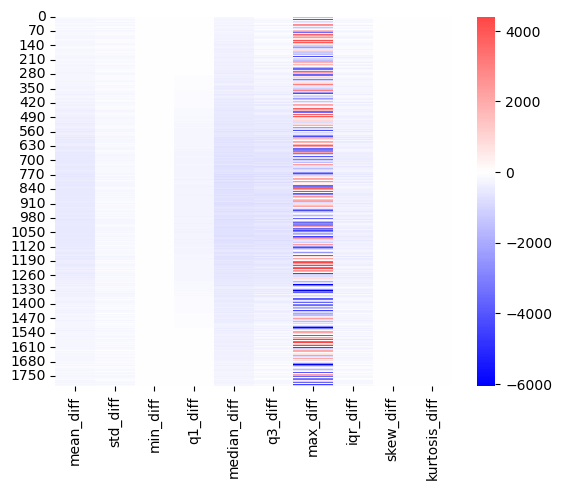

In [40]:
sns.heatmap(diff_df, cmap="bwr", center=0)

In [44]:
# So it looks like we can create these statistics as features (max diff will be an important predictor)
# this compares per feature i.e.  do pulsars and black holes differ per time step (the answer looks to be yes)

In [45]:
# Now let's consider the per row statistics (do the time series of pulsars time series shape differ compared to black holes)

In [46]:
def row_summary_stats(df):
    num_df = df.select_dtypes(include='number')
    
    summary = pd.DataFrame({
        'mean':   num_df.mean(axis=1),
        'std':    num_df.std(axis=1),
        'min':    num_df.min(axis=1),
        'q1':     num_df.quantile(0.25, axis=1),
        'median': num_df.quantile(0.50, axis=1),
        'q3':     num_df.quantile(0.75, axis=1),
        'max':    num_df.max(axis=1),
        'iqr':    num_df.quantile(0.75, axis=1) - num_df.quantile(0.25, axis=1),
        'skew':   num_df.skew(axis=1),
        'kurtosis': num_df.kurtosis(axis=1)
    })
    
    return summary

In [102]:
p_row_stats = row_summary_stats(pulsars_df)

In [103]:
bh_row_stats = row_summary_stats(bh_df)
# p_row_stats['group'] = 'Pulsar'
# bh_row_stats['group'] = 'Black Hole'

In [95]:
p_row_stats.shape, bh_row_stats.shape

((11145, 11), (3331, 10))

In [96]:
row_stats = pd.concat([p_row_stats, bh_row_stats], axis=0).reset_index(drop=True)
row_stats.shape

(14476, 11)

In [97]:
row_stats.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,group
0,1481.250000000000000,1849.612507455989316,0.0,0.0,697.0,2402.25,12522.0,2402.25,1.585469593376977,2.743842933811217,Pulsar
1,1478.492222222222154,1848.747698961159131,0.0,0.0,693.0,2411.00,12522.0,2411.00,1.585326440425273,2.739601646041901,Pulsar
2,1471.214444444444553,1845.343832322604158,0.0,0.0,678.0,2385.50,12522.0,2385.50,1.597439437300348,2.793968368119551,Pulsar
3,1468.466666666666697,1845.243821100812511,0.0,0.0,670.5,2380.50,12522.0,2380.50,1.601141543786311,2.805347605477940,Pulsar
4,1466.661666666666633,1843.232126761775362,0.0,0.0,672.5,2358.00,12522.0,2358.00,1.600364076605373,2.798479946385628,Pulsar


In [98]:
p_summary = p_row_stats.describe().T.drop(columns=["count"])
bh_summary = bh_row_stats.describe().T.drop(columns=["count"])

# comparison_row_df = pd.concat([
#     p_summary.assign(group='Pulsar'),
#     bh_summary.assign(group='Black Hole')
# ])
# comparison_row_df.shape

In [99]:
# comparison_row_df

<Axes: >

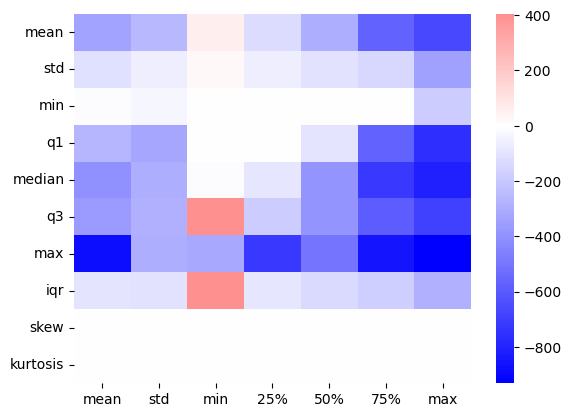

In [100]:
sns.heatmap(p_summary - bh_summary, cmap="bwr", center=0)

In [104]:
p_row_stats.mean() - bh_row_stats.mean()

mean       -340.352597928269915
std        -113.203517503627381
min          -8.498048634043831
q1         -268.046853032654496
median     -402.044683243277007
q3         -368.956895014935526
max        -883.963252500168892
iqr        -100.910041982281200
skew          0.035402089997218
kurtosis      0.037537210178853
dtype: float64

In [105]:
p_row_stats.max() - bh_row_stats.max()

mean       -665.305555555555657
std        -346.311026894158658
min        -181.000000000000000
q1         -762.250000000000000
median     -807.500000000000000
q3         -692.250000000000000
max        -932.000000000000000
iqr        -287.250000000000000
skew         -0.148625897247055
kurtosis     -0.783580052654848
dtype: float64

In [106]:
# looks like there are significant differences among the mean, max, and quartile ranges between observations from the two classes